<a href="https://colab.research.google.com/github/mossytreesandferns/DataCampHomework/blob/master/DCStatisticalThinking2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#Change working directory to make it easier to access the files
import os
os.chdir("/content/gdrive/My Drive/DCStatisticalThinking1and2/")
os.getcwd()

'/content/gdrive/My Drive/DCStatisticalThinking1and2'

# Parameter estimation by optimization
### Optimal parameters
The values that cause the model to be in closest agreement with the data are the mean and the standard deviation that are computed from the data: optimal parameters.  Won't work if model is wrong.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

no_hitters = pd.read_csv('mlb_nohitters.csv')
no_hitters.head(), no_hitters.tail()

(       date  game_number winning_team losing_team winning_pitcher
 0  18760715          140          NaN         NaN             NaN
 1  18800612         1035          NaN         NaN             NaN
 2  18800617         1046          NaN         NaN             NaN
 3  18800819         1177          NaN         NaN             NaN
 4  18800820         1179          NaN         NaN             NaN,
          date  game_number winning_team losing_team  winning_pitcher
 289  20150725       210250          PHI         CHN      Cole Hamels
 290  20150812       210490          SEA         BAL  Hisashi Iwakuma
 291  20150821       210610          HOU         LAN    Michael Fiers
 292  20150830       210740          CHN         LAN     Jake Arrieta
 293  20151003       211208          WAS         NYN     Max Scherzer)

In [ ]:
no_hitters.isnull().sum()

date                0
game_number         0
winning_team       66
losing_team        66
winning_pitcher    66
dtype: int64

In [ ]:
no_hitters.shape

(294, 5)

In [ ]:
#no_hitters.losing_team.value_counts()#

In [ ]:
len(no_hitters.game_number)

294

In [ ]:
nohitter_times = []
for i in range(1,len(no_hitters.game_number)):
  nohitter_times.append(no_hitters.game_number[i] - no_hitters.game_number[i-1] -1)
#games_betw  

In [ ]:
nohitter_times = np.array(nohitter_times)

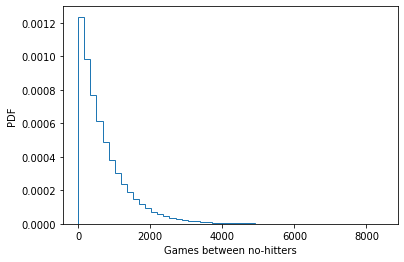

In [ ]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [ ]:
# Remember ecdf()
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

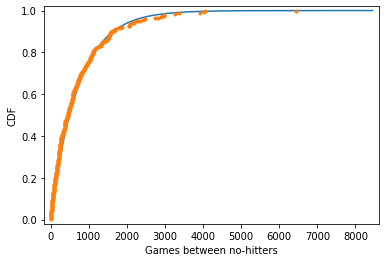

In [ ]:

# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

Data fits model very well.

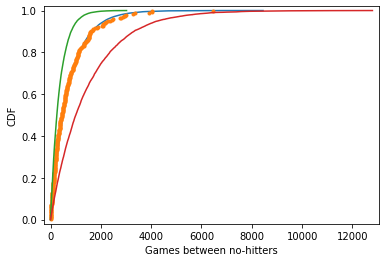

In [ ]:
# Plotting half and double the mean
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2,10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2,10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

### Linear regression by least squares
Parameters-slope and intercept. Best fitting line minimizes the the sum of the squares of the residuals. <br>
np.polyfit() (x, y, degree of polynomial to fit)<br>
slope, intercept = np.polyfit(parameters)-function returns slope and intercept parameters<br>


In [ ]:
df = pd.read_csv('female_literacy_fertility.csv')
df.head(3)

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"


In [ ]:
fertility = df['fertility']
illiteracy = 100 - df['female literacy']
#illiteracy

In [ ]:
# Recall pearson_r()
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

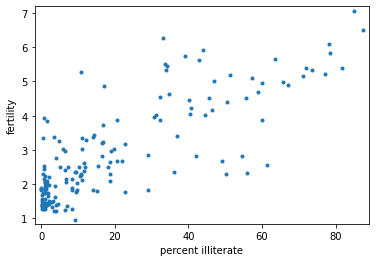

0.8041324026815344


In [ ]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

In [ ]:
x = np.arange(1,101)
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


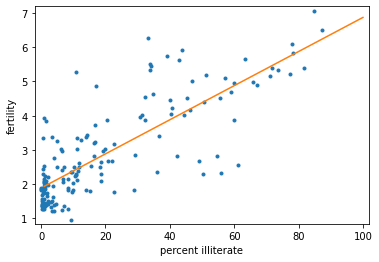

In [ ]:

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy,fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.arange(1,101)
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

In [ ]:
x=np.array([1,50])
x

array([ 1, 50])

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


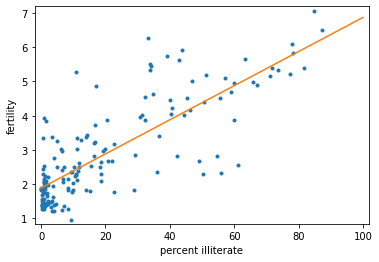

In [ ]:

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy,fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100]) # Same best fit line with only two x values
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


In [ ]:
a = np.linspace(1,2,100)
a

array([1.        , 1.01010101, 1.02020202, 1.03030303, 1.04040404,
       1.05050505, 1.06060606, 1.07070707, 1.08080808, 1.09090909,
       1.1010101 , 1.11111111, 1.12121212, 1.13131313, 1.14141414,
       1.15151515, 1.16161616, 1.17171717, 1.18181818, 1.19191919,
       1.2020202 , 1.21212121, 1.22222222, 1.23232323, 1.24242424,
       1.25252525, 1.26262626, 1.27272727, 1.28282828, 1.29292929,
       1.3030303 , 1.31313131, 1.32323232, 1.33333333, 1.34343434,
       1.35353535, 1.36363636, 1.37373737, 1.38383838, 1.39393939,
       1.4040404 , 1.41414141, 1.42424242, 1.43434343, 1.44444444,
       1.45454545, 1.46464646, 1.47474747, 1.48484848, 1.49494949,
       1.50505051, 1.51515152, 1.52525253, 1.53535354, 1.54545455,
       1.55555556, 1.56565657, 1.57575758, 1.58585859, 1.5959596 ,
       1.60606061, 1.61616162, 1.62626263, 1.63636364, 1.64646465,
       1.65656566, 1.66666667, 1.67676768, 1.68686869, 1.6969697 ,
       1.70707071, 1.71717172, 1.72727273, 1.73737374, 1.74747

In [ ]:
rss = np.empty_like(a)
rss

array([1.        , 1.01010101, 1.02020202, 1.03030303, 1.04040404,
       1.05050505, 1.06060606, 1.07070707, 1.08080808, 1.09090909,
       1.1010101 , 1.11111111, 1.12121212, 1.13131313, 1.14141414,
       1.15151515, 1.16161616, 1.17171717, 1.18181818, 1.19191919,
       1.2020202 , 1.21212121, 1.22222222, 1.23232323, 1.24242424,
       1.25252525, 1.26262626, 1.27272727, 1.28282828, 1.29292929,
       1.3030303 , 1.31313131, 1.32323232, 1.33333333, 1.34343434,
       1.35353535, 1.36363636, 1.37373737, 1.38383838, 1.39393939,
       1.4040404 , 1.41414141, 1.42424242, 1.43434343, 1.44444444,
       1.45454545, 1.46464646, 1.47474747, 1.48484848, 1.49494949,
       1.50505051, 1.51515152, 1.52525253, 1.53535354, 1.54545455,
       1.55555556, 1.56565657, 1.57575758, 1.58585859, 1.5959596 ,
       1.60606061, 1.61616162, 1.62626263, 1.63636364, 1.64646465,
       1.65656566, 1.66666667, 1.67676768, 1.68686869, 1.6969697 ,
       1.70707071, 1.71717172, 1.72727273, 1.73737374, 1.74747

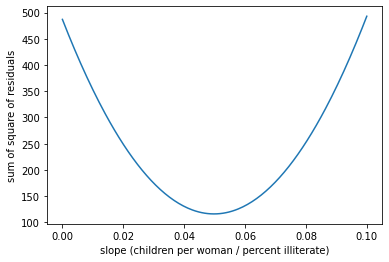

In [ ]:

# Specify slopes to consider: a_vals
a_vals = np.linspace(0,0.1,200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

### The importance of EDA: Anscombe's quartet
avg x and y values, sum of squares of residuals, and regression are the same for four very different graphs.  Moral: do graphical exploratory data analysis first!!!

In [ ]:
df = pd.read_csv('anscombe.csv')
df.head(12)

,0,0.1,1,1.1,2,2.1,3,3.1
0,x,y,x,y,x,y,x,y
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [ ]:
columns = ['x1','y1','x2','y2','x3','y3','x4','y4']
df.columns = columns
df.drop([0], inplace=True)

df.head()

,x1,y1,x2,y2,x3,y3,x4,y4
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


In [ ]:
x = df['x1'].astype(float)
y = df['y1'].astype(float)
x.dtype, y.dtype

(dtype('float64'), dtype('float64'))

0.5000909090909095 3.000090909090909


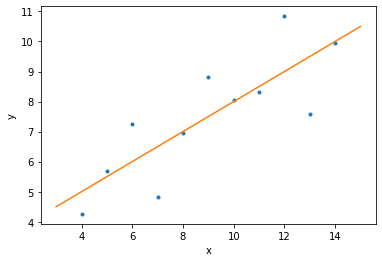

In [ ]:
# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [ ]:
x1 = df['x1'].astype(float)
y1 = df['y1'].astype(float)
x2 = df['x2'].astype(float)
y2 = df['y2'].astype(float)
x3 = df['x3'].astype(float)
y3 = df['y3'].astype(float)
x4 = df['x4'].astype(float)
y4 = df['y4'].astype(float)

anscombe_x = [x1, x2, x3, x4] 
anscombe_y = [y1, y2, y3, y4]
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)


slope: 0.5000909090909095 intercept: 3.000090909090909
slope: 0.5000000000000004 intercept: 3.0009090909090896
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.4999090909090908 intercept: 3.0017272727272735


# Bootstrap confidence intervals
### Generating bootstrap replicates
Randomly resample data set a desired number of times to recalculate mean, std, etc...

In [ ]:
import numpy as np
df = pd.read_csv('michelson_speed_of_light.csv')
df.head(2)

,Unnamed: 0,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles


In [ ]:
# General description of taking a random sample of an array
arr = np.array([1,2,3,4,5])
sample = np.random.choice(arr, 5)
sample, np.mean(arr), np.mean(sample)

(array([4, 5, 4, 1, 3]), 3.0, 3.4)

In [ ]:
len(df['velocity of light in air (km/s)'])

100

In [ ]:
michelson_sample = np.random.choice(df['velocity of light in air (km/s)'], 100)
michelson_sample, np.mean(michelson_sample)

(array([299910, 299840, 299720, 299790, 299850, 299840, 299840, 299880,
        299950, 299950, 299760, 299850, 299880, 299880, 299980, 299840,
        299740, 300000, 299960, 299870, 299810, 299960, 299760, 299830,
        299860, 299920, 299850, 299850, 299970, 299880, 299800, 299870,
        299840, 299810, 299880, 299850, 299830, 299870, 299880, 299880,
        299830, 299880, 299740, 299840, 299930, 299720, 299740, 299980,
        299880, 299860, 299970, 299760, 300070, 299930, 299890, 299860,
        299850, 299860, 299850, 299810, 299880, 299770, 299880, 299900,
        299920, 299780, 299620, 299980, 299720, 299850, 299880, 299810,
        299810, 299870, 299840, 299790, 299950, 299840, 299760, 299860,
        299760, 299880, 299910, 299910, 299880, 299620, 299840, 299810,
        299880, 299880, 299800, 299950, 299890, 299850, 299800, 299840,
        299860, 299950, 299800, 299900]), 299855.0)

In [ ]:
# Rainfall data from the Sheffield weather station
rain = pd.read_csv('sheffield_weather_station.csv', header=None, sep='\n')
#df = df[0].str.split(',', expand=True)
rain.head(10)

,0
0,# Cleaned up from http://www.metoffice.gov.uk/...
1,# More info: https://data.gov.uk/dataset/histo...
2,# Sheffield
3,"# Location 433900E 387200N, Lat 53.381 Lon -1...."
4,# Missing data (more than 2 days missing in mo...
5,# (af is air frost)
6,# yyyy mm tmax tmin af rain ...
7,# degC degC days mm ...
8,yyyy mm tmax tmin af rain ...
9,1883 1 6.3 1.7 6 122.1 ...


In [ ]:
rain.drop([0,1,2,3,4,5,6,7,8], inplace=True)

In [ ]:
rain.head()

,0
9,1883 1 6.3 1.7 6 122.1 ...
10,1883 2 8.0 2.8 2 69.8 ...
11,1883 3 4.8 -1.6 23 29.6 ...
12,1883 4 12.2 3.8 2 74.0 ...
13,1883 5 14.7 6.2 0 31.2 ...


In [ ]:
rain.dtypes

0    object
dtype: object

In [ ]:
rain[['yyyy', 'mm', 'tmax', 'tmin', 'af', 'rain', '...']] = rain[0].str.split(expand=True)
# columns = ['yyyy', 'mm', 'tmax', 'tmin', 'af', 'rain', '...']
# df.columns = columns
rain.head()

,0,yyyy,mm,tmax,tmin,af,rain,...
9,1883 1 6.3 1.7 6 122.1 ...,1883,1,6.3,1.7,6,122.1,---
10,1883 2 8.0 2.8 2 69.8 ...,1883,2,8.0,2.8,2,69.8,---
11,1883 3 4.8 -1.6 23 29.6 ...,1883,3,4.8,-1.6,23,29.6,---
12,1883 4 12.2 3.8 2 74.0 ...,1883,4,12.2,3.8,2,74.0,---
13,1883 5 14.7 6.2 0 31.2 ...,1883,5,14.7,6.2,0,31.2,---


In [ ]:
rain.columns

Index([0, 'yyyy', 'mm', 'tmax', 'tmin', 'af', 'rain', '...'], dtype='object')

In [ ]:
columns = [0, '...']
rain.drop(columns=columns, inplace=True)
rain.head()

,yyyy,mm,tmax,tmin,af,rain
9,1883,1,6.3,1.7,6,122.1
10,1883,2,8.0,2.8,2,69.8
11,1883,3,4.8,-1.6,23,29.6
12,1883,4,12.2,3.8,2,74.0
13,1883,5,14.7,6.2,0,31.2


In [ ]:
rain['rain'] = rain.rain.astype(float)

In [ ]:
rain.dtypes

yyyy     object
mm       object
tmax     object
tmin     object
af       object
rain    float64
dtype: object

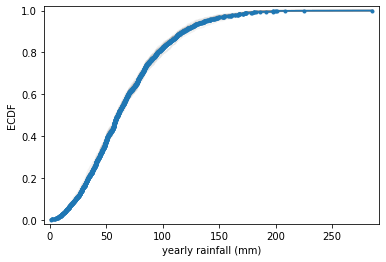

In [ ]:
rainfall = rain.rain
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, color = 'gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [ ]:
type(rainfall)

pandas.core.series.Series

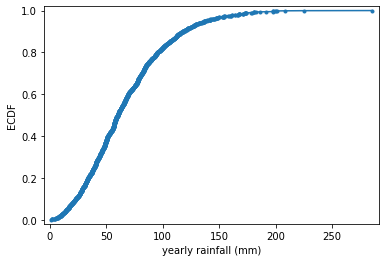

In [ ]:
# Generate bootstrap sample: bs_sample
bs_sample = np.random.choice(rainfall, size=len(rainfall))

# Compute and plot ECDF from bootstrap sample
x, y = ecdf(bs_sample)
_ = plt.plot(x, y, color = 'gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show() 

### Bootstrap confidence intervals


In [ ]:
df = pd.read_csv('michelson_speed_of_light.csv')
michelson_sample = np.random.choice(df['velocity of light in air (km/s)'], 100)

In [ ]:
# Creating function to create replicates
def bootstrap_replicate_1d(data, func):
  bs_sample = np.random.choice(data, len(data))
  return func(bs_sample)
bootstrap_replicate_1d(michelson_sample, np.mean)  

299854.4

In [ ]:
# Creating many replicates
bs_replicates = np.empty(10000)
for i in range(10000):
  bs_replicates[i] = bootstrap_replicate_1d(michelson_sample, np.mean)

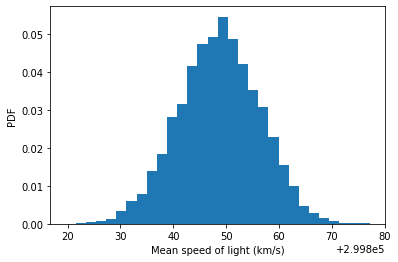

In [ ]:
plt.hist(bs_replicates, bins=30, density=True)
plt.xlabel('Mean speed of light (km/s)')
plt.ylabel('PDF')
plt.show()

In [ ]:
# Compute the 95% confidence interval of mean for a good-as-histogram measure of data
confidence = np.percentile(bs_replicates,[2.5,97.5])
confidence

array([299833.4, 299863.2])

In [ ]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

0.009443980786657044
0.9443980786657045


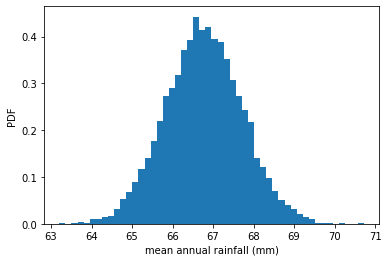

In [ ]:

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM Standard Error
sem =  np.std(bs_replicates) / np.sqrt(len(bs_replicates))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [ ]:
# Compute Confidence Interval
np.percentile(bs_replicates,[2.5,97.5])

array([64.91590668, 68.62696161])

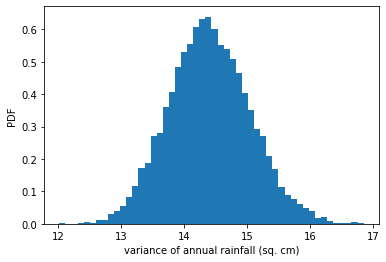

In [ ]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates /= 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

95% confidence interval = [628.1109215  815.64573379] games


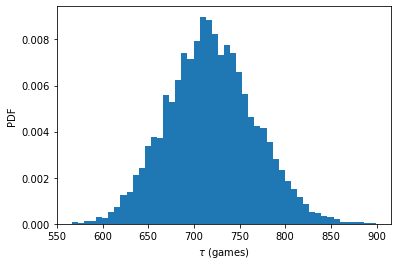

In [ ]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### Pairs Bootstrap
Using bootstrap techniques to estimate parameter values e.g. slope and intercept.

In [ ]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[0.04399799 0.05535502]


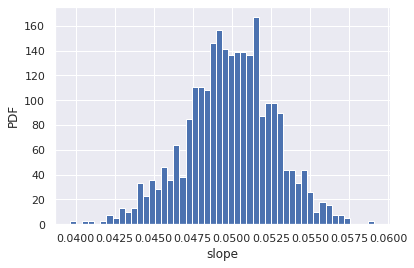

In [ ]:
# Generate replicates of slope and intercept using pairs bootstrap
import seaborn as sns
sns.set()
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

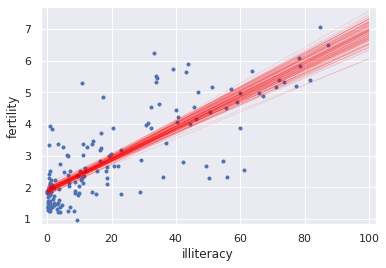

In [ ]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(0,100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.scatter(illiteracy, fertility, marker='.', linestyle='None')
_
# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

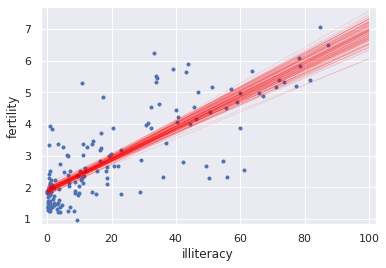

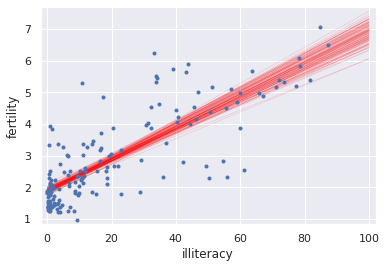

In [ ]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(0,100):
    _ = plt.plot(x, 
bs_slope_reps[i]*x + bs_intercept_reps[i],
linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.scatter(illiteracy, fertility, marker='.', linestyle='None')
_
# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

# Introduction to hypothesis testing
### Formulating and simulating a hypothesis
Testing whether what the model says is accurate to a desired degree. <br>
Permutation: reordering an array of data joine from two datasets that are assumed to be the same and normally distributed.

In [ ]:
swing = pd.read_csv('2008_swing_states.csv')
swing.head(2)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64


In [ ]:
swing['rep_share'] = swing.rep_votes/swing.total_votes * 100
swing.head(2)

,state,county,total_votes,dem_votes,rep_votes,dem_share,rep_share
0,PA,Erie County,127691,75775,50351,60.08,39.431910
1,PA,Bradford County,25787,10306,15057,40.64,58.389886


In [ ]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

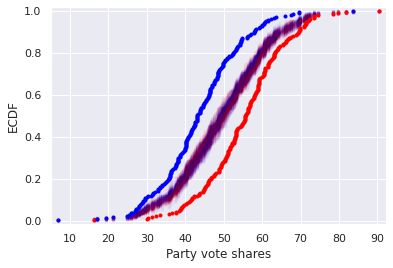

In [ ]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(swing.rep_share, swing.dem_share)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    
    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(swing.rep_share)
x_2, y_2 = ecdf(swing.dem_share)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('Party vote shares')
_ = plt.ylabel('ECDF')
plt.show()

### Test statistics and p values

In [ ]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [ ]:
df = pd.read_csv('finch_beaks_1975.csv', error_bad_lines=False)
df.head()

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


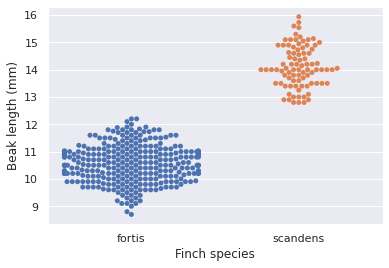

In [ ]:
# Make bee swarm plot
_ = sns.swarmplot(x='species',y='Beak length, mm',data=df)

# Label axes
_ = plt.xlabel('Finch species')
_ = plt.ylabel('Beak length (mm)')

# Show the plot
plt.show()

In [ ]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_2) - np.mean(data_1)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

NameError: ignored

### Bootstrap hypothesis test
Pipeline: state null hypotheses, define test statistic, generate simulated data, compute the test statistic for each simulated data set, the overall p value is the percentage of teh simulated data that has a test statistic that is at least as large as the test statistic.

In [ ]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

NameError: ignored

In [ ]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

NameError: ignored

# Hypothesis test examples
### A/B test examples
A/B testing: using hypothesis testing to see if there is a statistically significant difference between the data of two different groups observations.


In [ ]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems)/len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, size=10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

In [ ]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live,diff_of_means, 10000 )


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs)/len(perm_replicates)
print('p-val =', p)

### Test of correlation

In [ ]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs)/len(perm_replicates)
print('p-val =', p)

In [ ]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

In [ ]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                               np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                               np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

# Putting it all together: a case study
### Finch beaks and the need for case studies


In [ ]:
beaks2012 = pd.read_csv('finch_beaks_2012.csv')
beaks2012['year'] = '2012'
beaks2012.head(3)

,band,species,blength,bdepth,year
0,19022,fortis,10.0,8.5,2012
1,19028,fortis,12.5,8.9,2012
2,19032,fortis,9.3,7.5,2012


In [ ]:
beaks1975 = pd.read_csv('finch_beaks_1975.csv')
beaks1975['year'] = '1975'
columns = ['band','species','blength','bdepth','year']
beaks1975.columns = columns
beaks1975.head(3)

,band,species,blength,bdepth,year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975


In [ ]:
fortis1975 = beaks1975[beaks1975.species == 'fortis']
fortis2012 = beaks2012[beaks2012.species == 'fortis']
concat_fortis = pd.concat([fortis1975,fortis2012], ignore_index=True)
concat_fortis.head(3), concat_fortis.tail(3)

(   band species  blength  bdepth  year
 0     2  fortis      9.4     8.0  1975
 1     9  fortis      9.2     8.3  1975
 2    12  fortis      9.5     7.5  1975,
       band species  blength  bdepth  year
 434  21343  fortis     10.1     8.2  2012
 435  21349  fortis     10.6     9.2  2012
 436  22000  fortis     10.6     9.0  2012)

In [ ]:
concat_fortis.columns

Index(['band', 'species', 'blength', 'bdepth', 'year'], dtype='object')

In [ ]:
concat_fortis.dtypes

band         int64
species     object
blength    float64
bdepth     float64
year        object
dtype: object

In [ ]:
type(concat_fortis)

pandas.core.frame.DataFrame

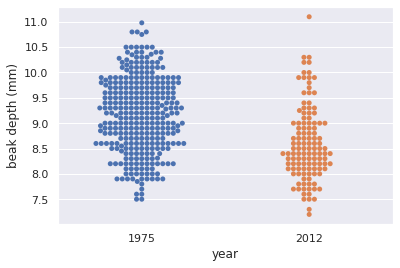

In [ ]:
_ = sns.swarmplot(x='year',y='bdepth',data=concat_fortis)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

In [ ]:
bd_1975 = concat_fortis.bdepth[concat_fortis.year == '1975']
bd_1975

0       8.00
1       8.30
2       7.50
3       8.00
4       9.90
       ...  
311     8.45
312     8.85
313    10.25
314     9.75
315     8.95
Name: bdepth, Length: 316, dtype: float64

In [ ]:
bd_2012 = concat_fortis.bdepth[concat_fortis.year == '2012']
bd_2012

316    8.5
317    8.9
318    7.5
319    9.6
320    9.2
      ... 
432    7.8
433    8.5
434    8.2
435    9.2
436    9.0
Name: bdepth, Length: 121, dtype: float64

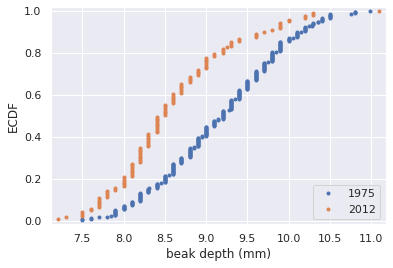

In [ ]:

# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()      # Why is there no plot for bdepth of 1975?

In [ ]:
np.mean(bd_1975)

9.171645569620255

In [ ]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_1975) - np.mean(bd_2012)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_1975 - bs_replicates_2012

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.5662736687938086 mm
95% confidence interval = [0.41160193 0.71504599] mm


In [ ]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 -np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0


### Variation in beak shapes

In [ ]:
bl_1975 = concat_fortis.blength[concat_fortis.year == '1975']
bl_2012 = concat_fortis.blength[concat_fortis.year == '2012']

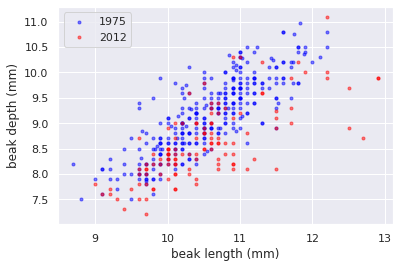

In [ ]:
# Make scatter plot of 1975 data
_ = plt.scatter(bl_1975, bd_1975, marker='.',
             linestyle='None', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.scatter(bl_2012, bd_2012, marker='.',
             linestyle='None', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In [ ]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_1975, bd_1975, 1000) # Had to change to 1975 values to get to work

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975,[2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012,[2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975,[2.5,97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012,[2.5,97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012) # I don't know why this isnt' working when it worked in dc console

1975: slope = 0.9006947853756156 conf int = [0.83508696 0.96632763]
1975: intercept = -0.34436585587035207 conf int = [-1.05007127  0.33043357]
2012: slope = 0.6561040669149377 conf int = [0.83128039 0.96309981]
2012: intercept = 1.704892268132645 conf int = [-1.01083365  0.38525611]


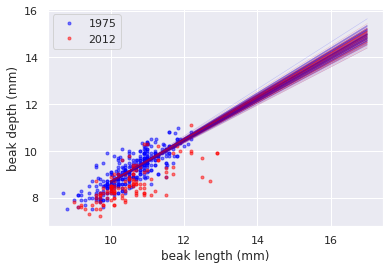

In [ ]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x+bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i]*x+bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

In [ ]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975,np.mean , 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012,np.mean , 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)


1975: mean ratio = 1.154557328563076 conf int = [1.14672095 1.16222691]
2012: mean ratio = 1.2250642338241673 conf int = [1.20855345 1.24202537]


### Calculation of heritability

In [ ]:
# Noway to convert downloadable data without gymnastics
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()


In [ ]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

In [ ]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis,bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r,1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis,bd_offspring_fortis, pearson_r,1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis,[2.5,97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

In [ ]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens,
                                     bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis,
                                   bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

In [ ]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted,
                                      bd_offspring_scandens)

# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)